## **Linear Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import warnings
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
viz = df.copy()

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# drop duplicates
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
# Calculate the index for the 80-20 split
split_index = int(len(df) * 0.8)

# Split the dataset into training and testing sets using the calculated index
train = df[:split_index]
test = df[split_index:]

# Display the shapes of the resulting DataFrames to verify the split
print("Training set shape :", train.shape)
print("Testing set shape :", test.shape)

Training set shape : (807, 7)
Testing set shape : (202, 7)


In [9]:
test_pred = test.copy()

In [10]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [11]:
y_train = train['Close'].values
y_test = test['Close'].values

In [12]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train);
y_pred = model_lnr.predict(x_test)

In [13]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 17.257
RMSE 4.154
MAE 3.051
MAPE 0.006
R2 Score :  0.997


In [14]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")

In [15]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [16]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
# drop duplicates
data.set_index('Date', inplace=True)
data = data.asfreq('D')
#data = data.drop_duplicates()
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [17]:
test_pred = test.copy()
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
807,2021-04-21,508.000000,515.460022,503.600006,508.899994,508.899994,22897400,511.473180
808,2021-04-22,513.820007,513.960022,500.549988,508.779999,508.779999,9061100,503.570092
809,2021-04-23,509.010010,509.700012,500.700012,505.549988,505.549988,7307700,503.146828
810,2021-04-26,506.760010,510.480011,503.000000,510.299988,510.299988,4388800,506.877319
811,2021-04-27,512.619995,512.989990,504.579987,505.549988,505.549988,3761300,506.550967
...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,420.415370
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,448.392921
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,434.208841
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,414.200544


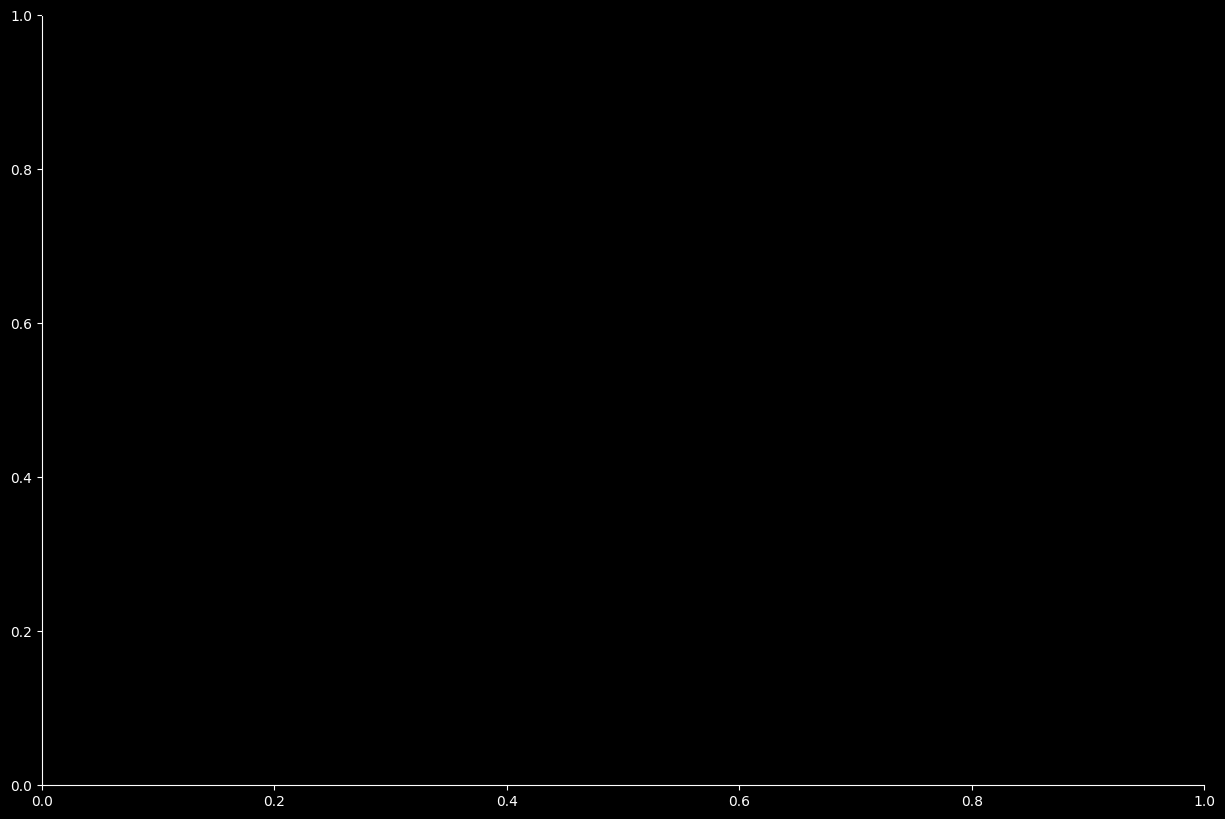

In [18]:
# plot prdictions vs actual values on test_pred using plotly express
style()
fig = px.line(test_pred, x='Date', y=['Close', 'Close_Prediction'], title='Close Price vs Close Price Prediction')
# bigger size
fig.update_layout(width=900, height=600)
fig.show();